In [4]:
import wandb

api = wandb.Api()
sweep = api.from_path("dpfrommer-projects/stanza/sweeps/ra02yimo")

In [5]:
import pandas as pd

datas = []
for run in sweep.runs:
    if "test_reward" not in run.summary_metrics:
        continue
    test_reward = run.summary_metrics["test_reward"]
    trajs = run.config["num_trajectories"]
    regularize = run.config["regularize_gains_lambda"] > 0
    datas.append({"test_reward": test_reward, "trajs": trajs, "regularize": regularize})
datas = pd.DataFrame(datas)

Text(0, 0.5, 'Normalied Test Reward')

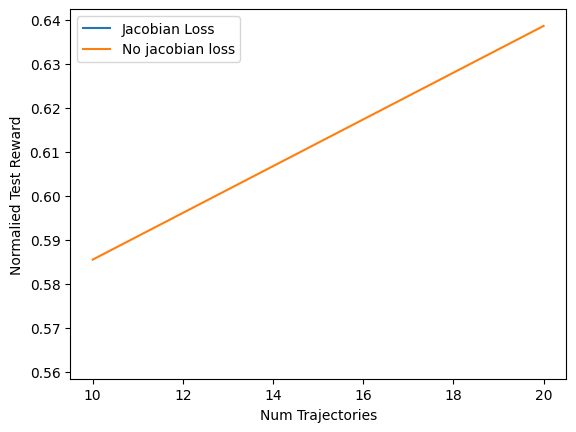

In [6]:
import matplotlib.pyplot as plt

r_data = datas[datas["regularize"] == True]
nr_data = datas[datas["regularize"] == False]
plt.plot(r_data["trajs"], r_data["test_reward"], label="Jacobian Loss")
plt.plot(nr_data["trajs"], nr_data["test_reward"], label="No jacobian loss")

plt.legend()
plt.xlabel("Num Trajectories")
plt.ylabel("Normalied Test Reward")